## Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Importing and reading data

In [3]:
df = pd.read_csv('/Users/himanshukumarsingh/Downloads/internship/CodSoft/IMDb Movies India.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Getting basic information of the data

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.shape

(15509, 10)

## Data Cleaning

In [8]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
# dropping columns having no ratings
df.dropna(subset='Rating', inplace=True)

In [10]:
# handling missing values

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Filling missing values for numerical columns with median
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Filling missing values for categorical columns with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/04/4534vf4n02v9rw5y_tsgqdkr0000gn/T/ipykernel_82311/1418233016.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/04/4534vf4n02v9rw5y_tsgqdkr0000gn/T/ipykernel_82311/1418233016.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [11]:
# checking again for null values
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

## Feature Engineering

In [12]:
# handling categorical variables
label_encoders = {}
for column in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [13]:
# convert the ‘Year’ and ‘Duration’ columns to numerical values
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/04/4534vf4n02v9rw5y_tsgqdkr0000gn/T/ipykernel_82311/2618565104.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
/var/folders/04/4534vf4n02v9rw5y_tsgqdkr0000gn/T/ipykernel_82311/2618565104.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)


In [14]:
# also the 'Votes' coloumn has values in the form of string so converting them to integer
df['Votes'] = df['Votes'].str.extract('(\d+)').astype(int)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/04/4534vf4n02v9rw5y_tsgqdkr0000gn/T/ipykernel_82311/2877410192.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Votes'] = df['Votes'].str.extract('(\d+)').astype(int)


## Data Visualization

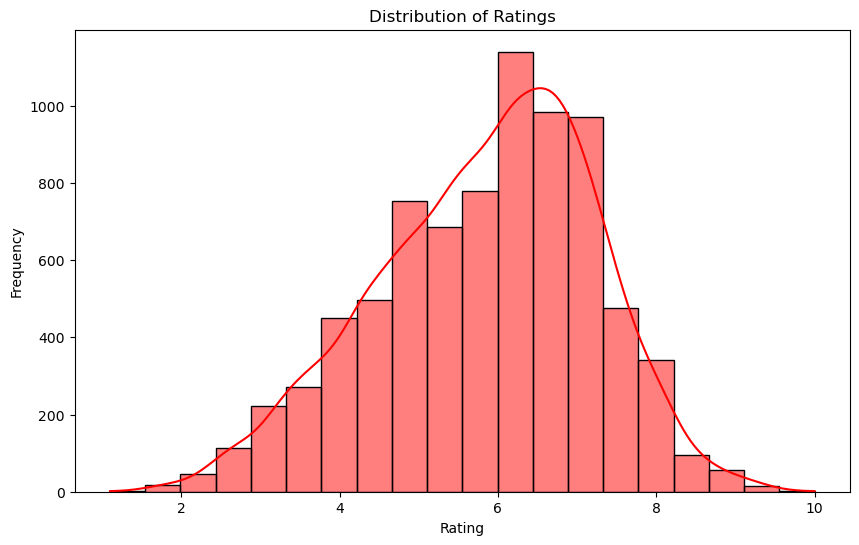

In [15]:
# distribution of rating

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], color = 'red', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### From the histogram showing the distribution of rating, it is clear that most of the movies got a rating of 6-7

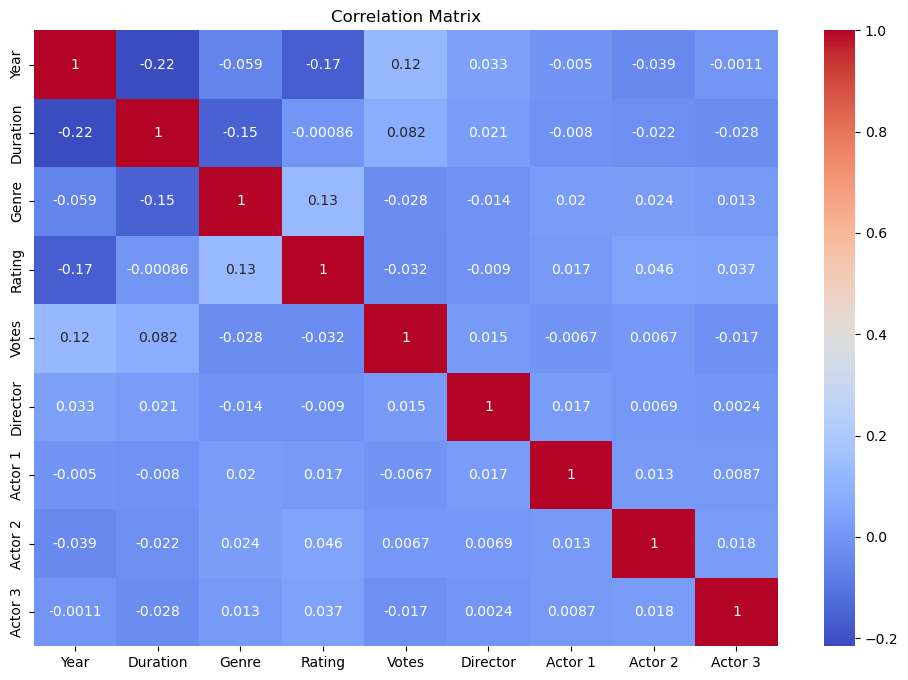

In [16]:
# correlation  heatmap
plt.figure(figsize=(12, 8))
df_1 = df.drop('Name', axis = 1)
correlation_matrix = df.drop('Name', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()              

# Preparing Data for modelling

In [17]:
# extracting the input and output features from the data
X = df.drop(['Name','Rating'], axis = 1)
y = df['Rating']

In [18]:
# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [19]:
# feature scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Model Fitting

In [20]:
# Using linear regression to predict the output
model = LinearRegression()
model.fit(X_train, y_train)

# making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [21]:
# evaluating performance of the model

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Train MSE: 1.8311818916610394
Test MSE: 1.8057823402006454
Train R2: 0.03906387391633126
Test R2: 0.05862249534591135


### Using linear regression we got a good training and testing MSE but the R2 score is very low so we should use some other models for the give data. It may be happening because of the non linear nature of the output variable.

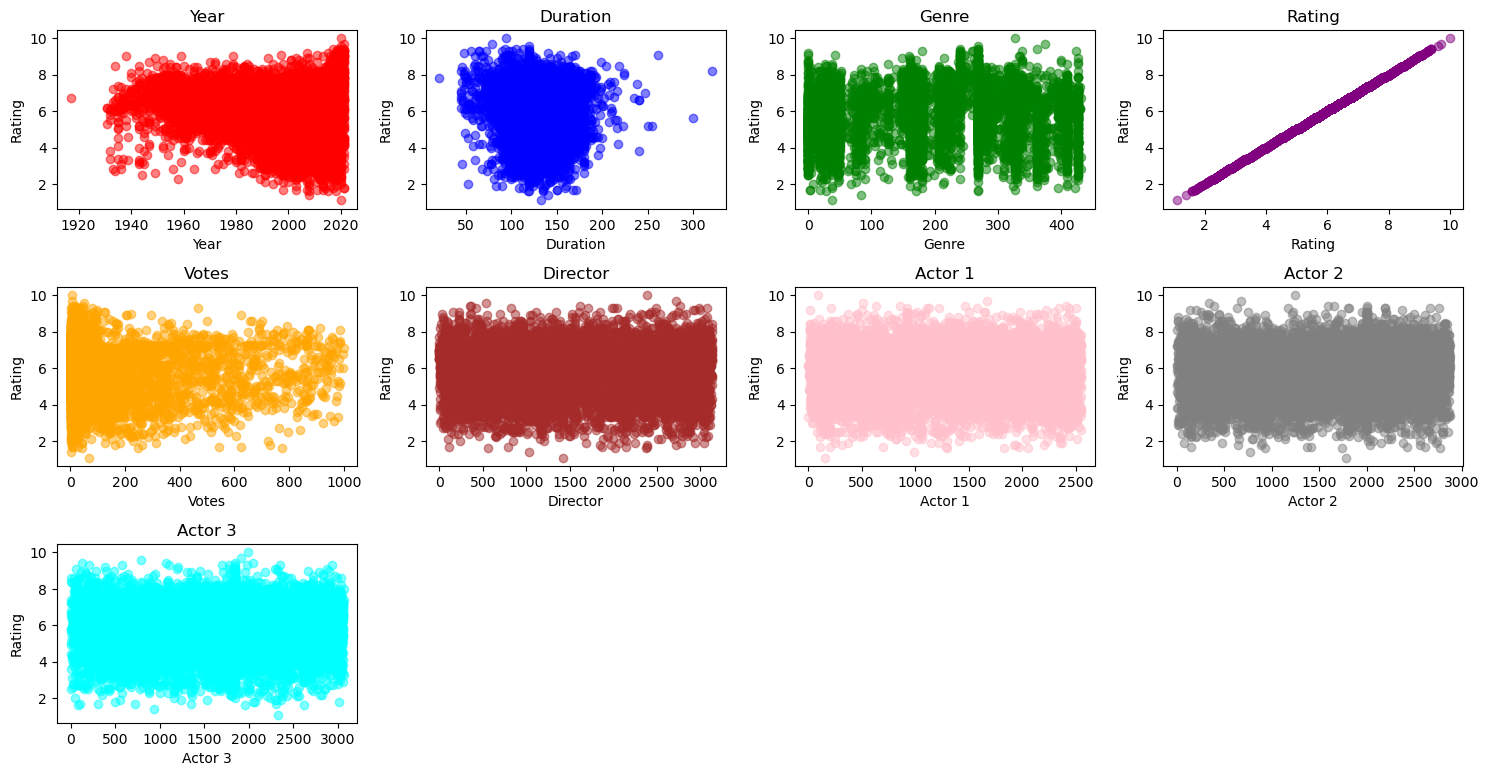

In [51]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Define a list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    color = colors[i % len(colors)]  # Cycle through the color list
    plt.scatter(df[feature], df['Rating'], alpha=0.5, color = color)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Rating')
plt.tight_layout()
plt.show()


### from the above plots, we can have a clear vision that the rating has a non linear distribution with input features

In [22]:
# Using Random Forest  to predict the output
model = RandomForestRegressor(n_estimators=100, max_depth= 6, random_state=42)
model.fit(X_train, y_train)

# making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [23]:
# evaluating performance of the model

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Train MSE: 1.29905710046644
Test MSE: 1.462634740320964
Train R2: 0.31830316618554
Test R2: 0.2375097422257768


In [24]:
# using Support Vector Machine Regressor to make predictions

from sklearn.svm import SVR

# Support Vector Regression model
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_reg.fit(X_train, y_train)

# Predictions
y_pred_train = svr_reg.predict(X_train)
Y_pred_test = svr_reg.predict(X_test)

In [25]:
# evaluating performance of the model

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Train MSE: 1.4138771077811232
Test MSE: 1.462634740320964
Train R2: 0.2580498983215884
Test R2: 0.2375097422257768


## Interpretation of result:-

### 1. Mean Squared Error (MSE)

####	•	Linear Regression:
####	•	Train MSE: 1.831, Test MSE: 1.806
####	•	The training and testing MSE values are similar, indicating that the model does not overfit but it also does not capture the underlying patterns well (low R²).
####	•	Random Forest and SVR:
####	•	Train MSE: 1.299, Test MSE: 1.463
####	•	The MSE values are lower compared to Linear Regression, indicating better performance. The difference between Train MSE and Test MSE is reasonable, suggesting a good generalization with a slight overfitting (expected in more complex models).

### 2. R² (Coefficient of Determination)

####	•	Linear Regression:
####	•	Train R²: 0.039, Test R²: 0.059
####	•	Very low R² values indicate that the model explains only about 3.9% of the variance in the training set and 5.9% in the test set. This suggests that Linear Regression is not capturing the relationships in the data well.
####	•	Random Forest and SVR:
####	•	Train R²: 0.318, Test R²: 0.238
####	•	Higher R² values compared to Linear Regression indicate that these models explain a larger proportion of the variance in the data. However, the difference between Train R² and Test R² suggests some overfitting, but it is within acceptable limits.
